In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = "ebay_iphone_prices.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

average_prices = data.groupby('Date')['Price'].mean()

sns.set(style='darkgrid') 

In [14]:
print(data.isnull().sum())
print(data.describe().round(2))
print(data['Date'].value_counts())
print(data['Sale_Format'].value_counts())

web-scraper-order        0
web-scraper-start-url    0
Listing                  0
Price                    0
Sale_Format              0
Shipping_Cost            0
Shipping_percent         0
Shipping                 0
Total sold               0
Item_Revenue             0
Bids                     0
Date                     0
dtype: int64
          Price  Shipping_Cost  Shipping_percent  Total sold  Item_Revenue  \
count  81272.00       81272.00          81272.00    81272.00      81272.00   
mean     644.26           3.74              0.41        4.90       3784.48   
min      150.10           0.00              0.00        1.00        150.01   
25%      364.63           0.00              0.00        1.00        374.69   
50%      573.68           5.51              0.00        1.00        626.21   
75%      865.62           5.96              1.00        1.00       1037.38   
max     2000.00         430.82              1.00     4923.00    4035679.65   
std      358.10           3.91         

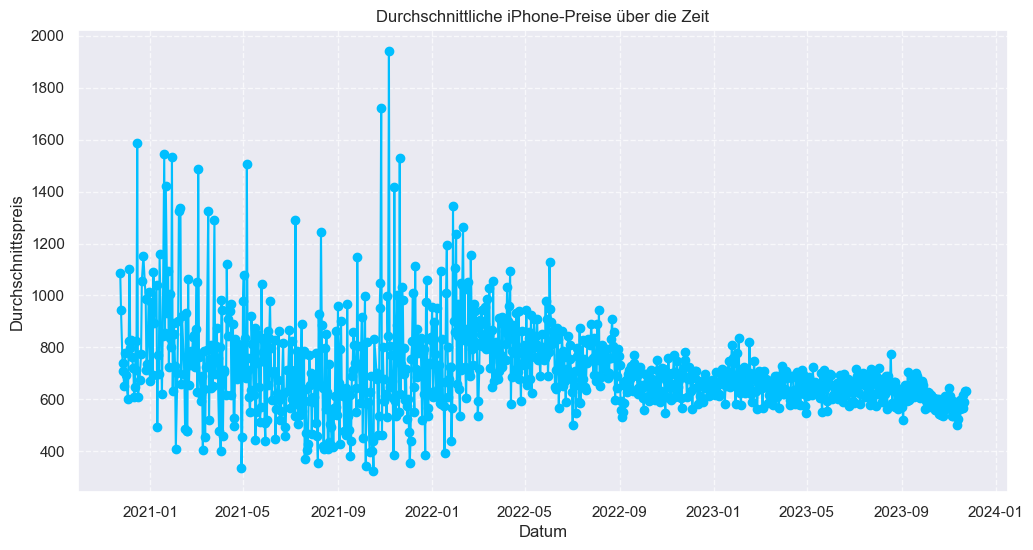

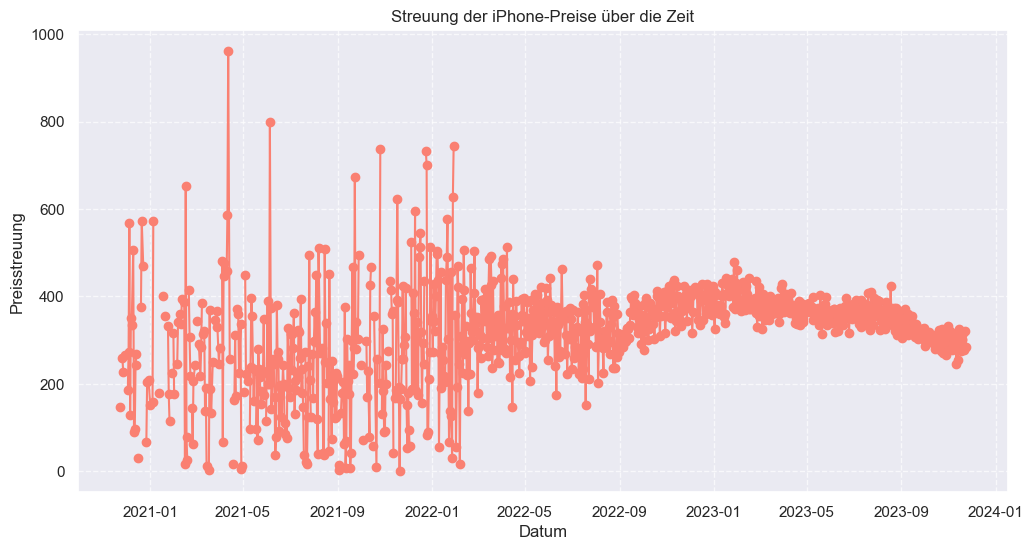

In [15]:

plt.figure(figsize=(12, 6))
plt.plot(average_prices, marker='o', linestyle='-', color='deepskyblue')  
plt.xlabel('Datum')
plt.ylabel('Durchschnittspreis')
plt.title('Durchschnittliche iPhone-Preise über die Zeit')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.show()

price_variability = data.groupby('Date')['Price'].std()

plt.figure(figsize=(12, 6))
plt.plot(price_variability, marker='o', linestyle='-', color='salmon')  
plt.xlabel('Datum')
plt.ylabel('Preisstreuung')
plt.title('Streuung der iPhone-Preise über die Zeit')
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()


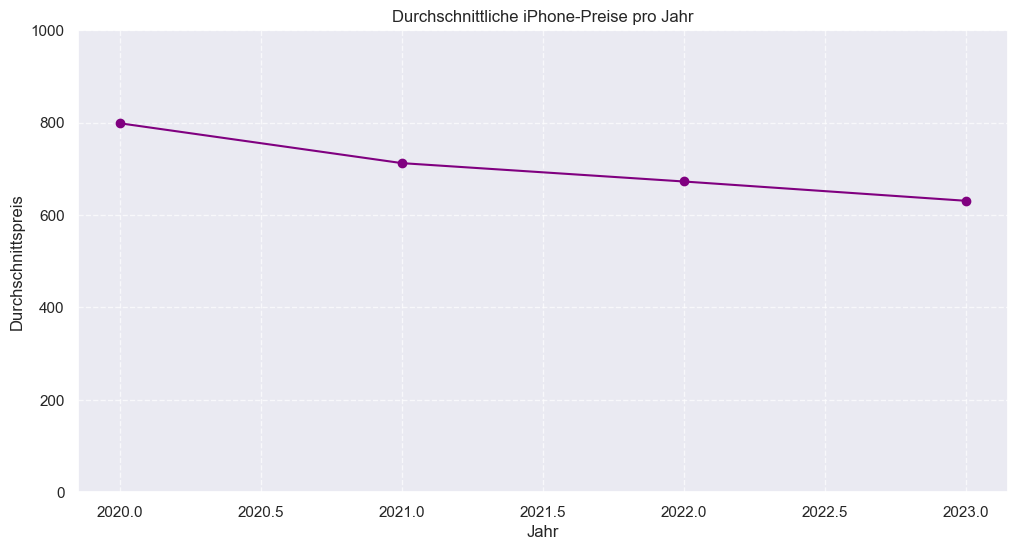

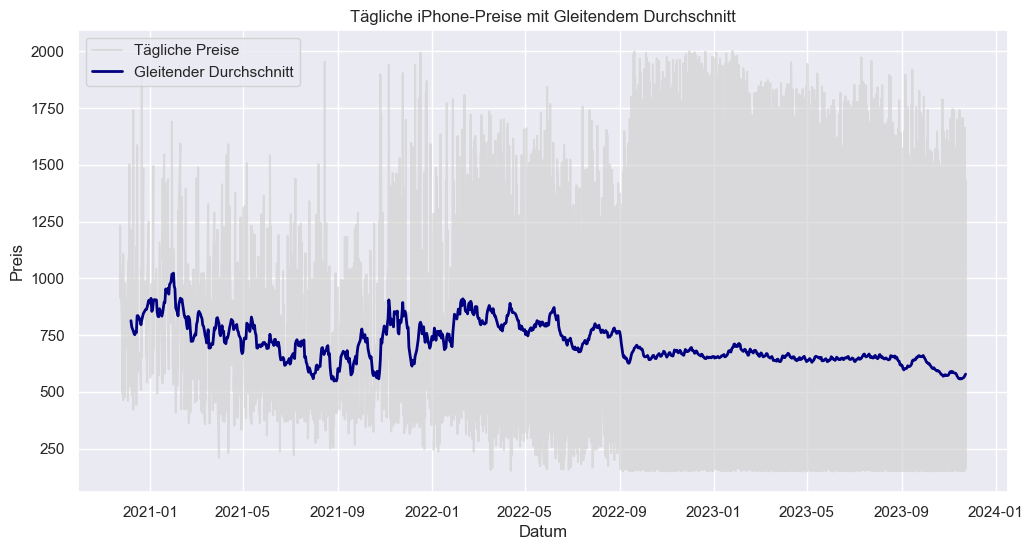

In [16]:
average_prices_yearly = data.groupby(data['Date'].dt.year)['Price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_prices_yearly, marker='o', linestyle='-', color='purple')  
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis')
plt.title('Durchschnittliche iPhone-Preise pro Jahr')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.ylim(0, 1000)
plt.show()

rolling_average = data.groupby('Date')['Price'].mean().rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Tägliche Preise', color='lightgray', alpha=0.7)
plt.plot(rolling_average, label='Gleitender Durchschnitt', linestyle='-', linewidth=2, color='navy')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.title('Tägliche iPhone-Preise mit Gleitendem Durchschnitt')
plt.legend()
plt.show()


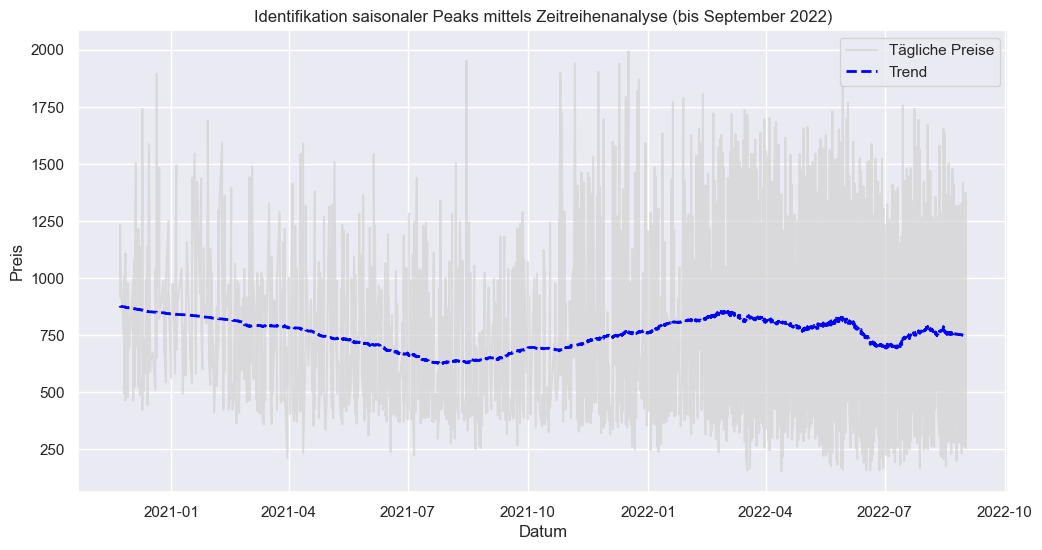

In [17]:
data_subset = data[data['Date'] <= '2022-09-01']

res = sm.tsa.seasonal_decompose(data_subset['Price'], period=365, extrapolate_trend='freq')

plt.figure(figsize=(12, 6))
plt.plot(data_subset['Date'], data_subset['Price'], label='Tägliche Preise', color='lightgray', alpha=0.7)
plt.plot(data_subset['Date'], res.trend, label='Trend', color='blue', linestyle='--', linewidth=2)
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.title('Identifikation saisonaler Peaks mittels Zeitreihenanalyse (bis September 2022)')
plt.legend()
plt.show()

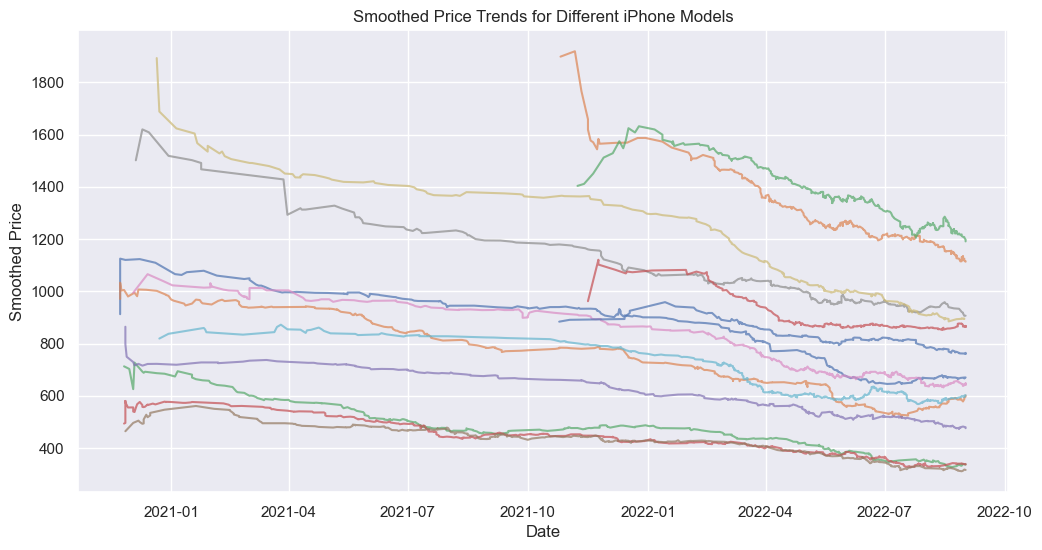

In [18]:
data['iPhone_Model'] = data['web-scraper-start-url'].str.extract(r'aspect=Modell%3A%3A%3A([^&]+)')
data['iPhone_Model'] = data['iPhone_Model'].str.replace('+', ' ')
data = data[data['Date'] <= '2022-09-01']
iphone_models = data['iPhone_Model'].unique()

plt.figure(figsize=(12, 6))

for model in iphone_models:
    model_data = data[data['iPhone_Model'] == model]
    smoothed_prices = model_data['Price'].rolling(window=50, min_periods=1).mean()
    plt.plot(model_data['Date'], smoothed_prices, label=model, alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Smoothed Price')
plt.title('Smoothed Price Trends for Different iPhone Models')
plt.legend().set_visible(False)
plt.show()